Only run the following cell once

In [5]:
# Only run this cell once
import os
moduledir = os.path.dirname( os.getcwd() )

os.chdir(moduledir) # Move up one directory so we can import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from UniversalConstants import *

# Carrier Densities at Finite Temperature

The expressions derived in [Background on the Band Structure of Bilayer Graphene](1_Background_on_Bilayer_Graphene_BandStructure.ipynb) allow us to derive expression for both the total carrier density on the two layers, $n_+=n_1+n_2$, and the carrier density difference between the two layers.This notebook describes how to work with the Fermi-Dirac distribution and use it to compute the carrier densities $n_+$ and $n_-$ at arbitrary temperature.

Once again, lets import an instance of the `Bilayer` class.

In [3]:
from Materials import Graphene

BLG = Graphene.Bilayer()

## Total Carrier Density $n_+=n_1+n_2$ at $T=0$

In the `Common` approximation, at temperature $T=0$, there is an analytic formula for $n_+$. There is no analytic formula for $n_-=n_1-n_2$ at $T=0 K$. Its computation will require numerical integration, so we will hold off on its discussion until the $T\neq 0 K$ section.

At $T=0$, there are minimum and maximum occupied Fermi wavevectors $k_{F\pm}$. In general then, the Fermi surface will be an annulus. The carrier density (including spin degeneracy $g_s=2$ and valley degeneracy $g_v=2$) then given by, writing explicitly as a function of $\epsilon_F$ and $u$,

$$ n_+(\epsilon_F,u)= g_sg_v \frac{\pi(k_{F+}(\epsilon_F,u)^2-k_{F-}(\epsilon_F,u)^2)}{(2\pi)^2}= \frac{k_{F+}(\epsilon_F,u)^2-k_{F-}(\epsilon_F,u)^2}{\pi} $$

Recall that this is a piecewise function equal to

$$ n_+ =\frac{1}{\pi}\left\{ \begin{array}{} 0 & \epsilon_F<\epsilon^* \\ k_{F+}^2 - k_{F-}^2 & \epsilon^*<\epsilon_F<u/2 \\  k_{F+}^2 & u/2 < \epsilon_F\end{array} \right.$$

This function is provided by `BLG.nplusT0`.

In [4]:
from Materials import Graphene
#from BLG.Universal_Constants import *
#from BLG.BLG_Constants import *
BLG = Graphene.Bilayer()
BLG.nplusT0?

Plotting for various applied potentials, we can explicitly see the gap.

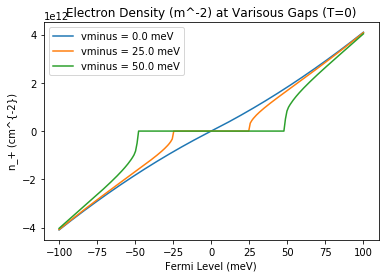

In [5]:
vplus = np.linspace(-0.1,0.1,num=200)
vminus  = np.linspace(0,0.05,num=3)

densities = BLG.nplusT0(vplus,vminus[:,np.newaxis])

for n,vminus in zip(densities,vminus):
    plt.plot(vplus*1000,n*10**-4, label = 'vminus = {} meV'.format(round(vminus*1000)))
    
plt.title('Electron Density (m^-2) at Varisous Gaps (T=0)')
plt.ylabel('n_+ (cm^{-2})')
plt.xlabel('Fermi Level (meV)')
plt.legend();

## Carrier densities at Non-zero Temperatures

Due to the Fermi-Dirac distribution, computation of $n_+$ and $n_-$ at nonzero temperature requires numerical integration.

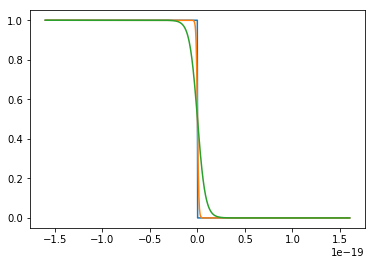

In [6]:
from StatisticalDistributions import Temperature

temps = np.array([0,50,300])
energies = np.linspace(-1,1,num=1000)[:,np.newaxis]*eVtoJ

plt.plot(energies*np.ones(len(temps)),Temperature.FermiDirac(energies,temps));


## Charge Density $n_+=n_1+n_2$  for $T\neq 0$

In two dimensions, the integral we wish to perform to determine the carrier density is given by

$$ n_+ = \frac{g_v g_s}{(2\pi)^2} \int\int d^2k (f(\epsilon-|e|V_+)-f(\epsilon+|e|V_+)) =\frac{2}{\pi} \int_0^{1/\sqrt{3}a}dk\quad k (f(\epsilon-|e|V_+)-f(\epsilon+|e|V_+))$$

where $g_v=2$ and $g_s=2$ account for valley and spin degeneracy respectively and we've performed the radial integral. Keep in mind we are ignoring the higher energy bands. For these purposes, a function `nplus` that yields the total carrier density $n_+$ at arbitrary temperature.

Recall that `nplusT0`provides an analytic formula for $n_+$ at $T=0$. We compare them here. They are offset for clarity. We see that the agreement is very good.

In [7]:
T = 0

vplus = np.linspace(0,0.2,num=100)
vminus = 0.1


n1 = BLG.nplusT0(vplus,vminus)

n2 = BLG.nplus(vplus,vminus,T) + 10**16

n3 = BLG.nplus(vplus,vminus,50) + 10**16

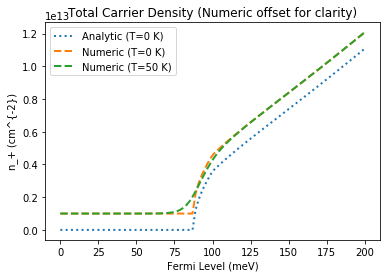

In [8]:
plt.plot(vplus*1000,n1*10**-4,label='Analytic (T=0 K)', linestyle=':',linewidth=2)
plt.plot(vplus*1000,n2*10**-4,label='Numeric (T=0 K)',linestyle='--',linewidth=2)
plt.plot(vplus*1000,n3*10**-4,label='Numeric (T=50 K)',linestyle='--',linewidth=2)
plt.ylabel('n_+ (cm^{-2})')
plt.xlabel('Fermi Level (meV)')
plt.title('Total Carrier Density (Numeric offset for clarity)')
plt.legend()
plt.show()

## Interlayer Charge Density Density $n_-=n_1-n_2$  for $T\neq 0$

Electrons also occupy the valence band. We must consider their contribution. In general

$$n_- = \frac{4}{(2\pi)^2}2\pi \int_0^{1/\sqrt{3}a}dk\quad k \left[f(\epsilon_c-|e|V_+)\Delta|\psi|_c^2+ f(\epsilon_v-|e|V_+)\Delta|\psi|_v^2 \right]$$

where the subscripts $c$ and $v$ refer to the conduction and valence bands respectively. Recall $\epsilon_v = -\epsilon_c$. In addition, $\Delta|\psi|_c^2$ has a factor of $1/\epsilon_c$ out front. So $\Delta|\psi|_v^2 = -\Delta|\psi|_c^2$. Converting all quantities to conduction band, and dropping all subscripts,

$$n_- = \frac{4}{(2\pi)^2}2\pi \int_0^{1/\sqrt{3}a}dk\quad k \left[f(\epsilon-|e|V_+)\Delta|\psi|^2 - f(-\epsilon-|e|V_+)\Delta|\psi|^2 \right]$$

$$n_- = \frac{2}{\pi} \int_0^{1/\sqrt{3}a}dk\quad k \left[f(\epsilon-|e|V_+) - f(-\epsilon-|e|V_+)\right]\Delta|\psi|^2$$

This expression is computed using `BLG.nminus`.

### `LowEnergy`

Young and Levitov find an analytic formula for $n_-$ in the `LowEnergy` approximation. The first equality is the expression they derive, and the second is the same quantity in our own notation

$$n_- = \left\{ \begin{array}{}
            \left(\frac{2m|e|V_-}{\pi\hbar^2}\right)\ln{\left( \frac{2\epsilon(k_c)/|e|}{|V_+|+\sqrt{V_+^2-V_-^2}} \right)} & |V_+|>|V_-|\\
\left(\frac{2m|e|V_-}{\pi\hbar^2}\right)\ln{\left( \frac{2\epsilon(k_c)/|e|}{|V_-|} \right)} & |V_-|>|V_+|
\end{array}\right. $$

$\Lambda = \epsilon(k_c)/|e|$ is a cutoff given by the energy at the edge of the Brillouin Zone, $\nu_0=2m/(\pi\hbar^2)$.

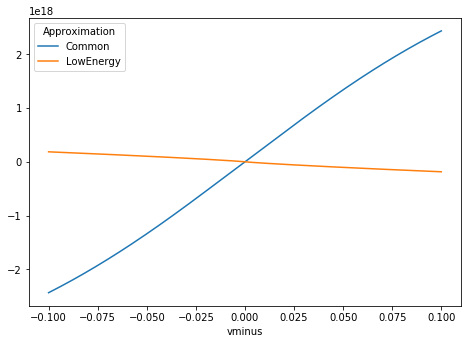

In [13]:
vminus = np.linspace(-0.1,0.1, num=200)
vplus  = 0.1

approxes = BLG.approx_choices
approxes.remove('None')

fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
ax.set_xlabel('vminus')

for approx in approxes:
    nm_array = []
    for vm in vminus:
        nm_array.append( BLG.nminus(0,vm,0,approx=approx) )
    ax.plot(vminus,np.array(nm_array),label='{}'.format(approx))
ax.legend(title = 'Approximation');

## High Resolution $n_+$ and $n_-$

Computations with `nplus` and `nminus` are too slow for practical applications since broadcasting produces a memory error. This is due to the numerical integral over 10000 points. The solution is to use `BLG.get_nplus` or `BLG.get_nminus`. This will pull a numpy array from the file `CarrierDensities/Temp_T_nplus_surface.npy` or `CarrierDensities/Temp_T_nminus_surface.npy` where $T$ is standing in for a temperature. These arrays contain the values of the functions `nplus` or `nminus` over a range of `vplus` and `vminus` to high resolution.

The values in these file were generated with `BLG.generate_nplus_nminus`. will generate the surfaces for any temperature and save them. Below, we plot the carrier densities from these files at $T=0 K$.

In [14]:
from mpl_toolkits import mplot3d

In [15]:
# Load the data
vplus = BLG.get_vplus(0)
vminus = BLG.get_vminus(0)

VPx , VMy = np.meshgrid(vplus,vminus)

nplus_surface = BLG.get_nplus(0)
nminus_surface = BLG.get_nminus(0)

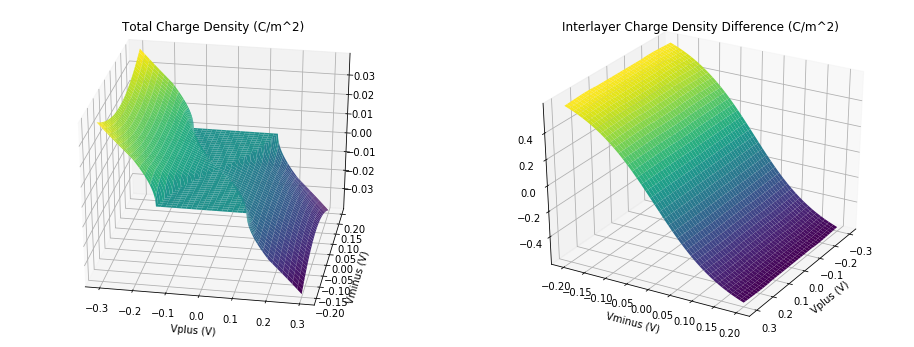

In [16]:
# Plot the surfaces (only every 10 points)
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_surface(VPx, VMy, -q*nplus_surface, rcount=40, ccount=40, 
                cmap = 'viridis', edgecolor='none')
ax1.set_ylabel('Vminus (V)')
ax1.set_xlabel('Vplus (V)')

ax1.set_title('Total Charge Density (C/m^2)')
ax1.view_init(30,-80);

ax2 = fig.add_subplot(122,projection='3d')
ax2.plot_surface(VPx, VMy, -q*nminus_surface, rcount=40, ccount=40, 
                cmap = 'viridis', edgecolor='none')
ax2.set_ylabel('Vminus (V)')
ax2.set_xlabel('Vplus (V)')

ax2.set_title('Interlayer Charge Density Difference (C/m^2)')
ax2.view_init(30,30);